<a href="https://colab.research.google.com/github/MarkNgendo/Cryptocurrency-Price-Prediction/blob/main/Cryptocurrency_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the question

### a.) Specifying data analytic question

 Using the trading time series of a cryptocurrency’s price, in addition to a set of qualitative features (news, social impact, Twitter, Reddit, social media sentiment analysis), we would like to build a model that forecasts a cryptocurrency’s price. In this challenge, we are focusing on the trading time series and how we can optimize currency forecasting. We will predict future cryptocurrency prices.



### b.) Defining metric for success


Our project will be considered a success when we build a model whose predictions are as close as possible to the actual values(having the lowest RMSE).

### c.)Understanding the context

After the boom and bust of cryptocurrencies’ prices in recent years, cryptocurrencies have been increasingly regarded as an investment asset. Because of their highly volatile nature, there is a need for good predictions on which to base investment decisions. Different existing studies have leveraged machine learning for more accurate cryptocurrency price prediction. We are interested in applying different modeling techniques to samples with different data structures (qualitative and quantitative data) and dimensional features to achieve an optimization in price prediction.

**NB:** The target value is the actual price. We have data extracted in an interval of 1h for a period of one year (from 1st of March 2020 to 1st of March 2021). We are interested in predicting the values of cryptocurrency prices in specific timestamps that we have in the validation file.

### d.) Recording experimental design

* Define the question, the metric for success, the context and experimental design taken.

* Read and explore the given dataset.

* Define the appropriateness of the available data to answer the given question.

* Find and deal with outliers, duplicates, anomalies, and missing data within the dataset.

* Perform univariate, bivariate and multivariate analysis recording my observations.

* Implementing the solution by building various models, comparing their perfomance after hyperparameter tuning with the aim of finding the one that meets our success criteria.

* Challenging our solution.

### e.) Data Relevance
Our data was relevant for our study with a wide range of variables to explore. The dataset douce can be found here [Cryptocurrency Dataset](https://docs.google.com/document/d/1ElEYvVw0d-AwctprS5f7YhWrFm8GEkME5KSmUsqDcJY/edit)

## Reading the data

### Importing relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.neural_network import MLPRegressor
%matplotlib inline

### Loading datasets

In [ ]:
df = pd.read_csv('Train.csv')

In [ ]:
test = pd.read_csv('Test.csv')

## Checking the data

### Previewing the top of our dataset

In [ ]:
df.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033780,49394.593520,49068.057050,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738480
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737120,10535.737120,10384.798220,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798220


In [ ]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,56.0,2.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062190,11351.690960,11335.062190,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,213.0,51.0,274.0,6046.0,3034.0,23453171.0,119.0,2305.0,1367.0,6252.0,151.0,565.0,603.0,4553.0,174.0,2900568.0,1898920.0,2268741.0,14056214.0,2338771.0,23465365.0,3.7,39.0,3.2,3.4,2.8,65.5,0.004407,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,72.0,30.0,112.0,2404.0,304.0,3831278.0,12.0,346.0,73.0,604.0,39.0,103.0,668.0,1406.0,188.0,29147.0,411178.0,873284.0,2389256.0,129448.0,3832828.0,3.7,2.0,3.0,3.0,3.4,65.5,0.024035,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,96.0,217.0,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,49.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


### previewing the bottom of our dataset

In [ ]:
df.tail()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
12627,ID_zybd4H,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,61.0,138.0,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN
12628,ID_zydeys,1,7294.506136,7306.701928,7292.729876,3.816704e+08,1.322473e+11,605.0,462.0,16.0,217.0,39.0,156.0,1501.0,241.0,10909376.0,9.0,170.0,44.0,292.0,35.0,51.0,358.0,973.0,84.0,163376.0,304833.0,775658.0,9213680.0,452344.0,10910586.0,3.7,2.0,3.3,3.0,2.6,63.0,0.019912,1.0,1007.0,2.0,1.0,1.0,NaN,NaN,2020,NaN,1.978198e+11,7303.640282
12629,ID_zyfj4W,1,8811.121632,8832.560173,8754.602574,2.412260e+09,1.621298e+11,1653.0,757.0,74.0,249.0,60.0,107.0,4852.0,513.0,14878543.0,92.0,1127.0,454.0,3252.0,144.0,203.0,952.0,3101.0,452.0,617875.0,656816.0,2617007.0,10307241.0,684529.0,14885477.0,3.7,44.0,2.8,3.0,3.9,67.0,0.020715,1.0,918.0,2.0,1.0,1.0,1.0,2.0,5787,NaN,2.493421e+11,8828.440234
12630,ID_zz5eGB,1,9661.514681,9662.196605,9645.133934,9.861517e+08,1.774933e+11,1376.0,657.0,39.0,81.0,43.0,122.0,3915.0,675.0,14439095.0,153.0,871.0,274.0,3343.0,74.0,188.0,671.0,2691.0,291.0,278732.0,360131.0,1733775.0,10881941.0,1189157.0,14445315.0,3.8,25.0,3.0,4.4,4.5,78.5,0.012411,1.0,603.0,2.0,1.0,1.0,NaN,9.0,4679,2.706432,2.757547e+11,9658.204385
12631,ID_zzwUuL,1,11846.368560,11846.368560,11795.042560,3.914378e+09,2.182397e+11,969.0,600.0,36.0,136.0,45.0,164.0,2802.0,1335.0,11682657.0,34.0,503.0,298.0,2056.0,81.0,340.0,260.0,2019.0,102.0,358043.0,1636000.0,1076579.0,8431676.0,183250.0,11686817.0,3.6,40.0,2.5,3.7,2.9,63.5,0.013254,1.0,780.0,1.0,1.0,1.0,1.0,1.0,3523,-1.575454,3.836728e+11,11795.042560


In [ ]:
test.tail()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
6217,ID_zufSPk,1,8266.942912,8266.942912,8259.796103,310063715.0,1.491229e+11,618.0,438.0,15.0,202.0,42.0,164.0,996.0,262.0,3310472.0,19.0,217.0,135.0,715.0,2.0,25.0,273.0,671.0,25.0,987.0,187128.0,1174018.0,1933268.0,16157.0,3318645.0,3.7,3.0,2.4,2.3,3.9,61.5,0.007076,1.0,921.0,2.0,1.0,1.0,NaN,NaN,1494,-0.967973,2.262125e+11
6218,ID_zuz9yf,1,10869.612770,10873.493490,10865.827630,698936037.0,2.011601e+11,1608.0,911.0,84.0,204.0,45.0,123.0,5994.0,3808.0,30985192.0,219.0,3020.0,1416.0,7673.0,196.0,502.0,605.0,4484.0,207.0,14614866.0,1739950.0,2052440.0,12246575.0,343689.0,30999455.0,3.7,31.0,2.9,3.9,3.0,67.5,0.005486,1.0,807.0,2.0,1.0,1.0,NaN,6.0,7065,NaN,3.523272e+11
6219,ID_zvrMSX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,139.0,167.0,317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN
6220,ID_zy9Cfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
6221,ID_zyAFd7,1,7058.172796,7078.973345,7052.332304,473093253.0,1.275507e+11,954.0,672.0,20.0,110.0,65.0,2459.0,2708.0,291.0,10140687.0,15.0,399.0,121.0,838.0,97.0,243.0,502.0,1689.0,177.0,237801.0,1389120.0,1272925.0,6398945.0,843269.0,10143186.0,3.6,4.0,3.1,3.0,2.8,62.5,0.012064,1.0,858.0,2.0,1.0,1.0,NaN,NaN,3469,-3.289226,1.926557e+11


### Dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6222 non-null   object 
 1   asset_id                 6222 non-null   int64  
 2   open                     4304 non-null   float64
 3   high                     4304 non-null   float64
 4   low                      4304 non-null   float64
 5   volume                   4302 non-null   float64
 6   market_cap               4191 non-null   float64
 7   url_shares               4285 non-null   float64
 8   unique_url_shares        4285 non-null   float64
 9   reddit_posts             6122 non-null   float64
 10  reddit_posts_score       6122 non-null   float64
 11  reddit_comments          6109 non-null   float64
 12  reddit_comments_score    6109 non-null   float64
 13  tweets                   4289 non-null   float64
 14  tweet_spam              

## External Data Source Validation

## Tidying the dataset

### Consistency

In [ ]:
df.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

### Completeness

In [ ]:
df.isnull().sum()

id                            0
asset_id                      0
open                       4015
high                       4015
low                        4015
volume                     4027
market_cap                 4253
url_shares                 4057
unique_url_shares          4057
reddit_posts                241
reddit_posts_score          241
reddit_comments             230
reddit_comments_score       230
tweets                     4048
tweet_spam                 4048
tweet_followers            4058
tweet_quotes               4058
tweet_retweets             4058
tweet_replies              4058
tweet_favorites            4058
tweet_sentiment1           4048
tweet_sentiment2           4048
tweet_sentiment3           4048
tweet_sentiment4           4048
tweet_sentiment5           4048
tweet_sentiment_impact1    4048
tweet_sentiment_impact2    4048
tweet_sentiment_impact3    4048
tweet_sentiment_impact4    4048
tweet_sentiment_impact5    4048
social_score               4048
average_

In [ ]:
test.isnull().sum()

id                            0
asset_id                      0
open                       1918
high                       1918
low                        1918
volume                     1920
market_cap                 2031
url_shares                 1937
unique_url_shares          1937
reddit_posts                100
reddit_posts_score          100
reddit_comments             113
reddit_comments_score       113
tweets                     1933
tweet_spam                 1933
tweet_followers            1935
tweet_quotes               1935
tweet_retweets             1935
tweet_replies              1935
tweet_favorites            1935
tweet_sentiment1           1933
tweet_sentiment2           1933
tweet_sentiment3           1933
tweet_sentiment4           1933
tweet_sentiment5           1933
tweet_sentiment_impact1    1933
tweet_sentiment_impact2    1933
tweet_sentiment_impact3    1933
tweet_sentiment_impact4    1933
tweet_sentiment_impact5    1933
social_score               1933
average_

It is important to note that we have columns that have more importance than others and some of these include open and market cap. Therefore, we will first drop any rows where these  entries are missing. There is need to reexamine the dataset after that.

In [ ]:
df.dropna(axis=0,
          subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
          inplace = True)

In [ ]:
# checking for remaining null values

df.isnull().sum()

id                            0
asset_id                      0
open                          0
high                          0
low                           0
volume                        0
market_cap                    0
url_shares                    7
unique_url_shares             7
reddit_posts                 21
reddit_posts_score           21
reddit_comments              20
reddit_comments_score        20
tweets                        0
tweet_spam                    0
tweet_followers               0
tweet_quotes                  0
tweet_retweets                0
tweet_replies                 0
tweet_favorites               0
tweet_sentiment1              0
tweet_sentiment2              0
tweet_sentiment3              0
tweet_sentiment4              0
tweet_sentiment5              0
tweet_sentiment_impact1       0
tweet_sentiment_impact2       0
tweet_sentiment_impact3       0
tweet_sentiment_impact4       0
tweet_sentiment_impact5       0
social_score                  0
average_

In [ ]:
# for the test data, we have to subject it to the same procedures

test.dropna(axis=0,
          subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
          inplace = True)

# checking remaining null values

test.isnull().sum()

id                            0
asset_id                      0
open                          0
high                          0
low                           0
volume                        0
market_cap                    0
url_shares                    3
unique_url_shares             3
reddit_posts                  5
reddit_posts_score            5
reddit_comments               4
reddit_comments_score         4
tweets                        0
tweet_spam                    0
tweet_followers               0
tweet_quotes                  0
tweet_retweets                0
tweet_replies                 0
tweet_favorites               0
tweet_sentiment1              0
tweet_sentiment2              0
tweet_sentiment3              0
tweet_sentiment4              0
tweet_sentiment5              0
tweet_sentiment_impact1       0
tweet_sentiment_impact2       0
tweet_sentiment_impact3       0
tweet_sentiment_impact4       0
tweet_sentiment_impact5       0
social_score                  0
average_

The remaining null values have no bearing if they are imputed with zeros. For example, reddit posts null values indicate no posts were shared on Reddit during that time.

Before that, there are several columns that have been either compiled into a single one(the social media columns) or have barely any usefulness upon performing extensive data walkthrough.

### Accuracy

In [ ]:
# list of relevant columns to keep

useful = ['id', 'open', 'high', 'low', 'volume', 'market_cap', 'social_score',
          'average_sentiment', 'price_score', 'social_impact_score',
          'correlation_rank', 'volatility', 'market_cap_global',
          'percent_change_24h', 'close']

# appending relevant columns to an empty list
drop = []
for x in list(df.columns):
  if x not in useful:
    drop.append(x)

df.drop(labels= drop,
        axis = 1,
        inplace = True)

df.head()

,id,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global,close
0,ID_322qz6,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,11681999.0,3.6,2.7,3.6,3.3,0.007118,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,5924770.0,3.7,2.0,2.0,1.0,0.009419,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,49202.033780,49394.593520,49068.057050,3.017729e+09,9.166977e+11,47796942.0,3.7,3.1,3.0,3.3,0.013530,4.942448,1.530712e+12,49120.738480
4,ID_324kJH,10535.737120,10535.737120,10384.798220,1.150053e+09,1.921183e+11,14426405.0,3.7,4.7,3.8,4.4,0.010332,2.609576,3.386925e+11,10384.798220
6,ID_325m2L,9697.250948,9712.247413,9697.250948,1.231231e+09,1.767035e+11,30476752.0,3.7,3.5,3.0,3.1,0.008594,1.159070,2.807819e+11,9712.247413


In [ ]:
# checking for null values in remaining columns

df.isnull().sum()

id                     0
open                   0
high                   0
low                    0
volume                 0
market_cap             0
social_score           0
average_sentiment      0
price_score            0
social_impact_score    0
correlation_rank       0
volatility             0
percent_change_24h     0
market_cap_global      0
close                  0
dtype: int64

In [ ]:
drop = []
for x in list(test.columns):
  if x not in useful:
    drop.append(x)


# dropping irrelevant columns in test set

test.drop(labels = drop,
          axis = 1,
          inplace = True)

test.head()

,id,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global
1,ID_325SNW,11335.062190,11351.690960,11335.062190,1.064152e+09,2.101463e+11,23465365.0,3.7,3.2,3.4,2.8,0.004407,-0.555698,3.631052e+11
2,ID_325uzE,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,3832828.0,3.7,3.0,3.0,3.4,0.024035,1.689370,1.771075e+11
5,ID_329H37,12309.911240,12317.022590,12286.508940,1.045155e+09,2.270841e+11,35113830.0,3.7,3.1,3.8,5.0,0.013678,3.920331,3.916727e+11
6,ID_32DnK8,9301.916435,9301.916435,9293.747775,6.607626e+08,1.705124e+11,23962084.0,3.6,2.8,4.0,3.2,0.009051,-0.510029,2.665700e+11
8,ID_32H6TE,9269.535206,9278.101979,9241.140352,5.767781e+08,1.690120e+11,9392039.0,3.7,3.2,4.3,3.8,0.018312,2.604443,2.523184e+11


In [ ]:
test.isnull().sum()

id                     0
open                   0
high                   0
low                    0
volume                 0
market_cap             0
social_score           0
average_sentiment      0
price_score            0
social_impact_score    0
correlation_rank       0
volatility             0
percent_change_24h     0
market_cap_global      0
dtype: int64

In [ ]:
# checking the shapes of the dataset after this procedure

df.shape, test.shape

((8039, 15), (4029, 14))

### Validity

### Outlier Handling


Checking for outliers using boxplots

In [ ]:
# Creating a function that plots boxplots using a for loop

def plot_boxplots(target_dataframe,col_names):
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)

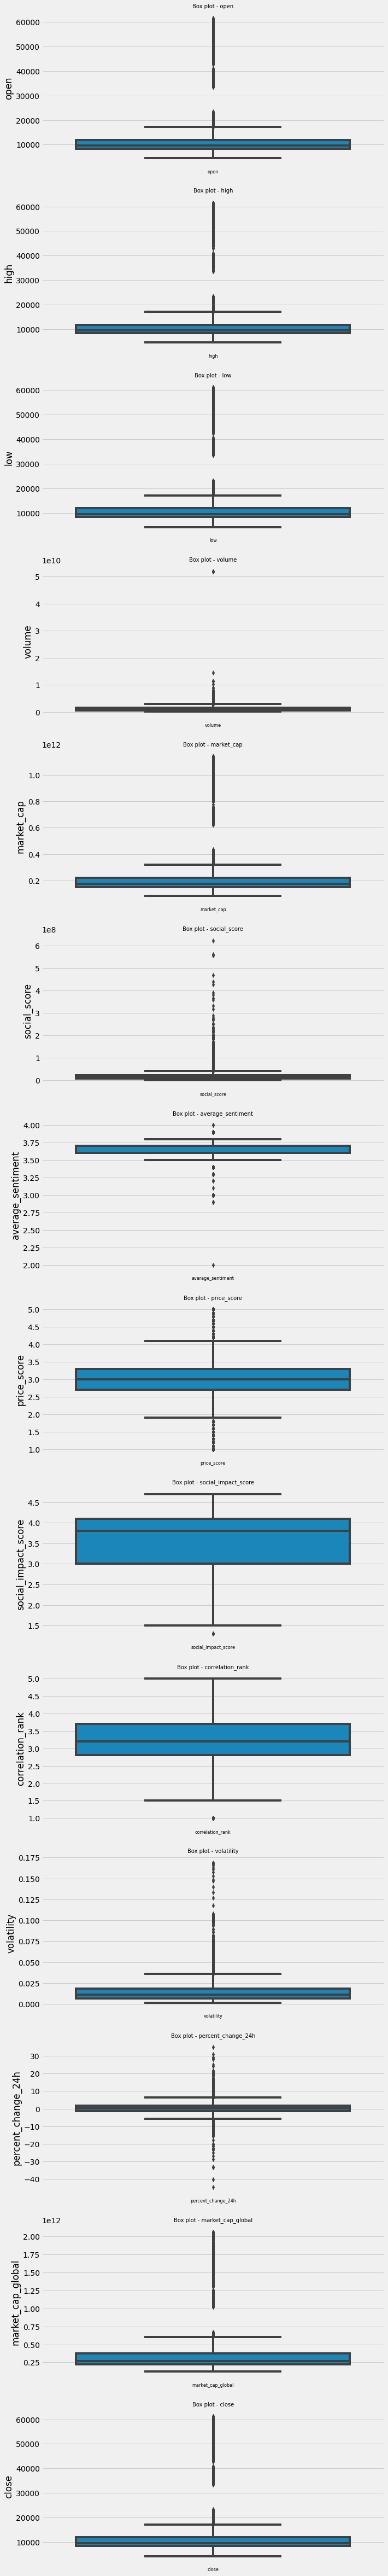

In [ ]:
# Checking for outliers in our variables

col_names = [i for i in df.describe().columns]

plt.style.use('fivethirtyeight')
plot_boxplots(df,col_names)
plt.show()

> Locating the outliers to find out what they are and what effect they have on our data

In [ ]:
# Index based search of outliers
indexes = []
percents = {}
percent_outliers = []
def percent_search(df):

  # for loop to create column interquantile ranges
  for x in df.describe().columns:
    q1 = df.describe().at['25%', x]
    q3 = df.describe().at['75%', x]
    iqr = q3 - q1

    # Upper and lower detection limits
    upper = q3 + iqr * 1.5
    lower = q1 - iqr * 1.5
    
    # catching percentage outliers in each column
    number = []
    
    # looping through entries in a column
    for pos, val in enumerate(df[x]):

      if val < lower or val > upper:
        number.append(pos)
        

        if pos not in indexes:
          indexes.append(pos)

    percent_outliers.append(len(number) / len(df[x]) * 100)

  percents = {column : percent for (column, percent) in zip(list(df.describe().columns), percent_outliers)}

  return  percents

In [ ]:
# finding how outlier presence in columns

percent_search(df)

{'average_sentiment': 1.4802836173653438,
 'close': 18.696355268068167,
 'correlation_rank': 1.1568603060082099,
 'high': 18.770991416842893,
 'low': 18.646597835551685,
 'market_cap': 18.5346436123896,
 'market_cap_global': 13.272795123771614,
 'open': 18.721233984326407,
 'percent_change_24h': 7.16507028237343,
 'price_score': 14.753078741136957,
 'social_impact_score': 0.049757432516482146,
 'social_score': 11.270058464983206,
 'volatility': 5.448438860554796,
 'volume': 4.776713521582286}

**Explanation**

The outliers accurately reflect how the real cryptocurrency prices vary in the market. On top of this, dropping them would cut our dataset in half. Therefore, the decision that was arrived at was one of keeping them as they are to avoid altering the data

In [ ]:
# Export the csv
df.to_csv("ForyouJoy.csv")

## Exploratory Data Analysis

### Univariate Data Analysis

#### a) Measures of Central Tendency 

In [ ]:
#finding the mean, median and mode
for i in df.describe().columns:
  print(f'for column {i}')
  print('mean:', df[i].mean())
  print('median:', df[i].median())
  print('mode:', df[i].mode())
  print('*********************************************** \n')
  

for column open
mean: 15288.152232215922
median: 9579.472658
mode: 0    8962.00541
dtype: float64
*********************************************** 

for column high
mean: 15342.046086504553
median: 9594.687673
mode: 0    8962.00541
dtype: float64
*********************************************** 

for column low
mean: 15233.433473295701
median: 9556.010183
mode: 0    8947.227578
dtype: float64
*********************************************** 

for column volume
mean: 1276821288.3443215
median: 967679345.0
mode: 0    5.185678e+10
dtype: float64
*********************************************** 

for column market_cap
mean: 282352139419.5675
median: 175395212779.0
mode: 0    8.875422e+11
1    8.935197e+11
2    9.026881e+11
3    9.093261e+11
4    9.099567e+11
5    9.111170e+11
6    9.133164e+11
7    9.155700e+11
8    9.207742e+11
9    9.214360e+11
dtype: float64
*********************************************** 

for column social_score
mean: 22209912.64883692
median: 13877658.0
mode: 0      1243

The following was observed:
* The average opening price was 15288.15.
* The average closing price was 15290.42.
* The most occurring, mode, opening price was 8962.00.
* The most occurring, mode, closing price was 8947.22

#### b) Measures of Dispersion

In [ ]:
#Finding the measures of dispersion
for i in df.describe().columns:
  print(f'for column {i}')
  print('maximum: ', df[i].max())
  print('minimum: ', df[i].min())
  print('std: ', df[i].std())
  print('var: ', df[i].var())
  print('skewness: ', df[i].skew())
  print('kurtosis: ', df[i].kurt())
  print('************************************* \n')


for column open
maximum:  61408.929761
minimum:  4545.08779
std:  14228.956256007787
var:  202463196.13538313
skewness:  2.166014580389779
kurtosis:  3.157917977891319
************************************* 

for column high
maximum:  61507.371479999994
minimum:  4589.712024
std:  14316.407368021068
var:  204959519.9271279
skewness:  2.1650821172067123
kurtosis:  3.1465999217158065
************************************* 

for column low
maximum:  61073.192884000004
minimum:  4267.2922579999995
std:  14143.407087897263
var:  200035964.05398253
skewness:  2.1662916012029836
kurtosis:  3.165197949563233
************************************* 

for column volume
maximum:  51856777871.0
minimum:  237362203.0
std:  1459909186.8871272
var:  2.131334833957433e+18
skewness:  21.346636977485424
kurtosis:  717.484052834753
************************************* 

for column market_cap
maximum:  1140904733639.0
minimum:  83937648770.0
std:  266407831097.01974
var:  7.09731324698182e+22
skewness:  2.16

The following was observed:
* The maximum and minimum closing prices were 61259.67 and 4267.29 respectively
* The maximimun and minimum opening prices were 61408.92 and 4545.08 respectively.
* The variables open, high, low, volume, market cap, social score, volatility, market cap global and close are positively skewed with most values concentrated to the left.
* Whereas the variables average sentiment and social impact score are negatively skewed with most values concentrated to the right.
* Finally the variables price score, correlation rank and percent change 24h assume a nomal distribution.

#### Plotting histograms

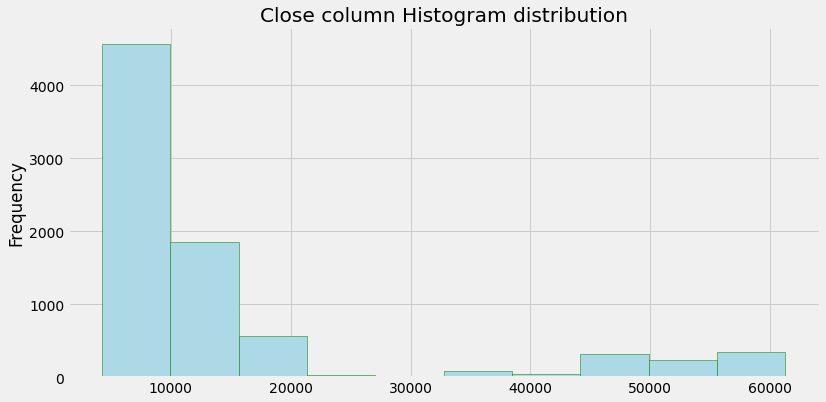

In [ ]:
# Histogram of close column 
df.close.plot(kind='hist', facecolor='lightblue', edgecolor='green',
              figsize=(12,6))
plt.title("Close column Histogram distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


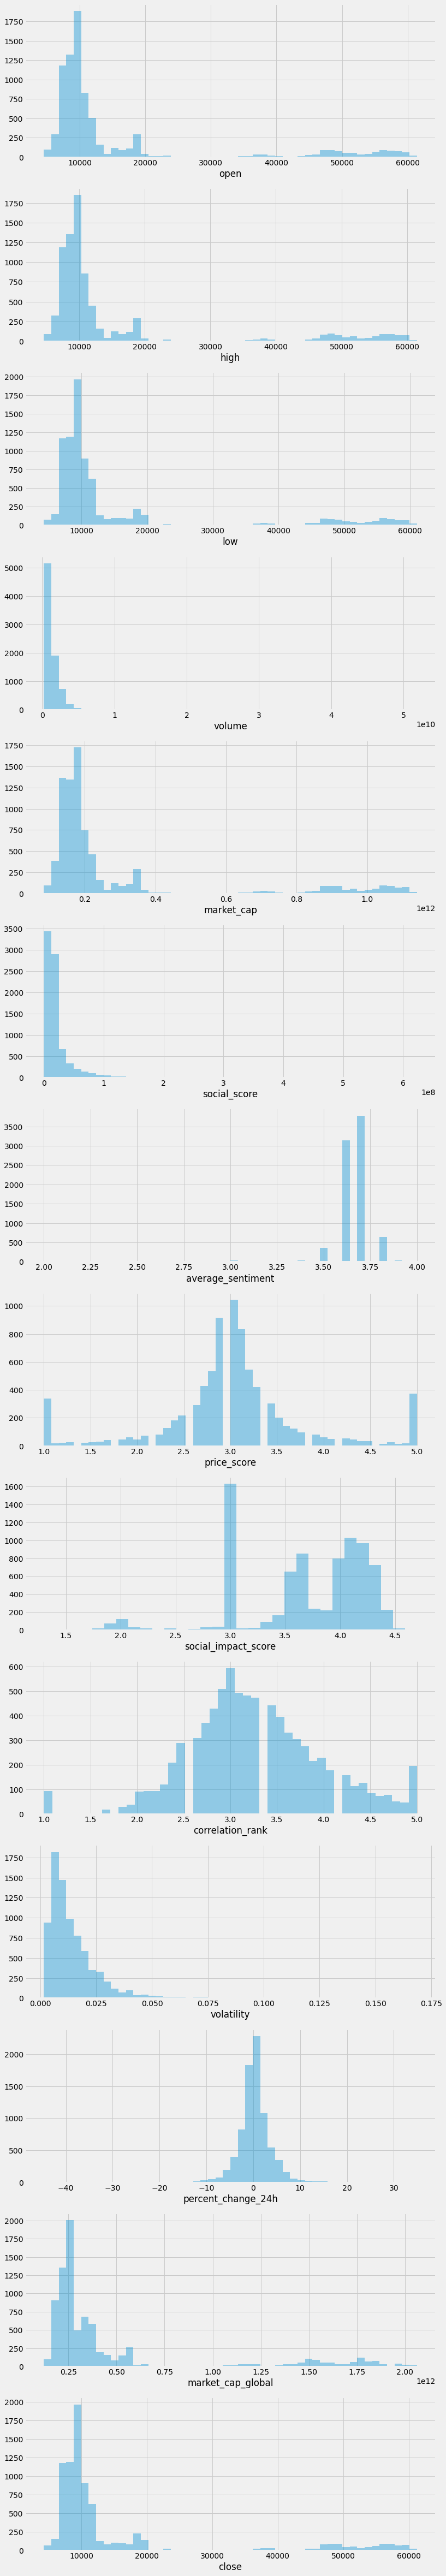

In [ ]:
# plotting the histograms of numerical variables

fig, ax = plt.subplots(len(df.describe().columns), figsize=(12,80))
for x, col in enumerate(df.describe().columns):
  sns.distplot(df[col], ax=ax[x], kde=False)
  # ax[x].set_title('{}'.format(col), fontsize=10)
  # ax[x].set_xlabel(col, fontsize=8)

plt.show()



### Bivariate Data Analysis

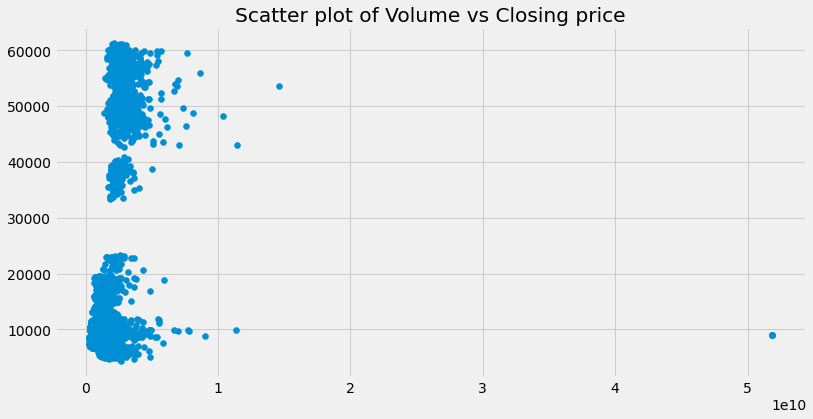

In [ ]:
# scatter plot of volume vs close

plt.figure(figsize=(12, 6))
plt.scatter(df['volume'], df['close'])
plt.title("Scatter plot of Volume vs Closing price")
plt.show()

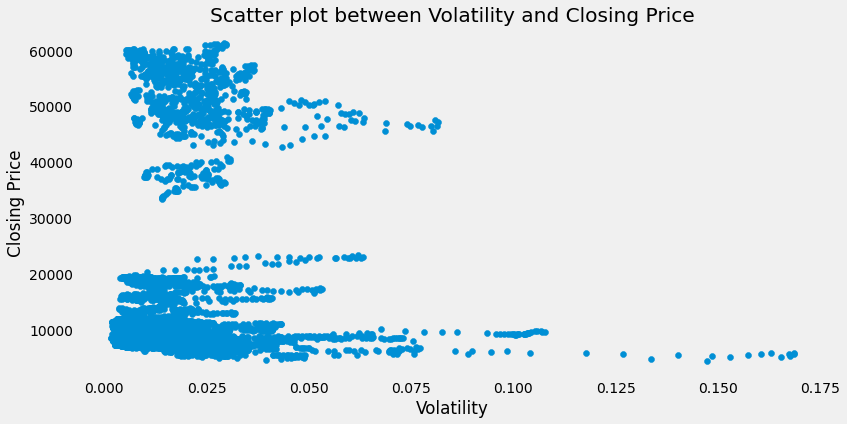

In [ ]:
# scatter plot of volatility vs close

plt.figure(figsize=(12, 6))
plt.scatter(df['volatility'], df['close'])
plt.title("Scatter plot between Volatility and Closing Price")
plt.xlabel("Volatility")
plt.ylabel("Closing Price")
plt.grid()
plt.show()


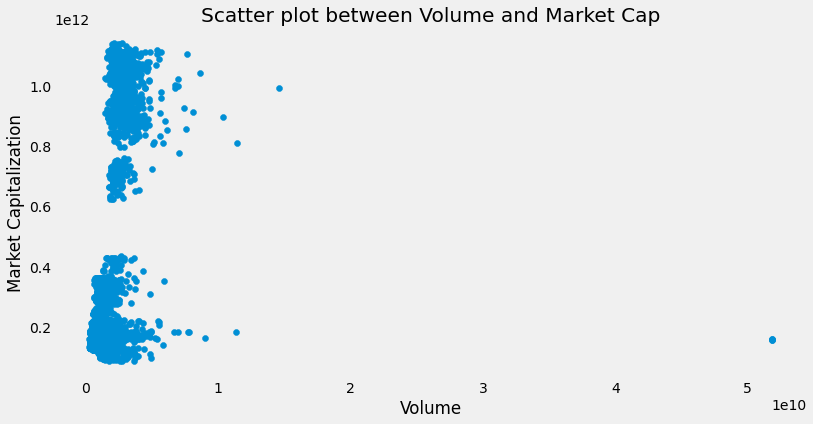

In [ ]:
# scatter plot of volume vs market cap

plt.figure(figsize=(12, 6))
plt.scatter(df['volume'], df['market_cap'])
plt.title("Scatter plot between Volume and Market Cap")
plt.xlabel("Volume")
plt.ylabel("Market Capitalization")
plt.grid()
plt.show()

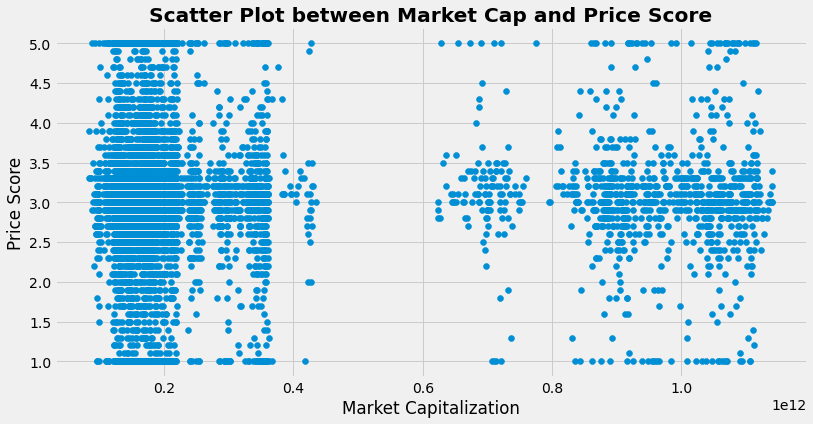

In [ ]:
# scatter plot of market cap vs price score

plt.figure(figsize=(12, 6))
plt.scatter(df['market_cap'], df['price_score'])
plt.xlabel("Market Capitalization")
plt.ylabel("Price Score")
plt.title("Scatter Plot between Market Cap and Price Score", fontweight = 'bold')
plt.show()


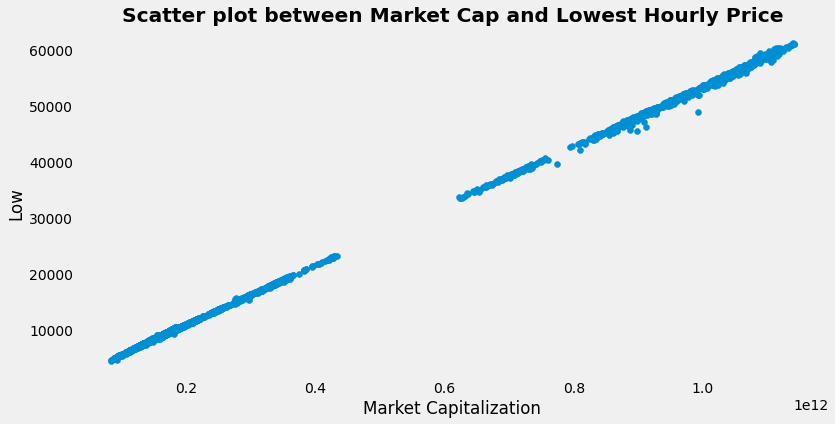

In [ ]:
# scatter plot of market cap vs low

plt.figure(figsize=(12, 6))
plt.scatter(df['market_cap'], df['low'])
plt.title("Scatter plot between Market Cap and Lowest Hourly Price", fontweight='bold')
plt.xlabel("Market Capitalization")
plt.ylabel("Low")
plt.grid()
plt.show()

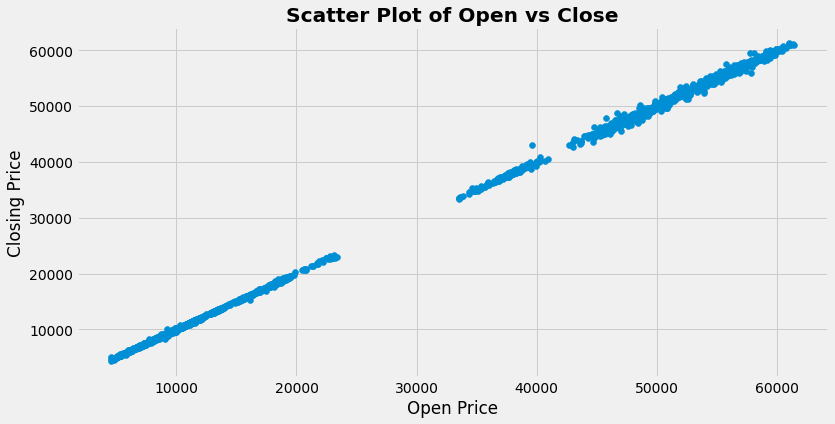

In [ ]:
# scatter plot of open vs close

plt.figure(figsize=(12, 6))
plt.scatter(df['open'], df['close'])
plt.xlabel("Open Price")
plt.ylabel("Closing Price")
plt.title("Scatter Plot of Open vs Close", fontweight='bold')
plt.show()


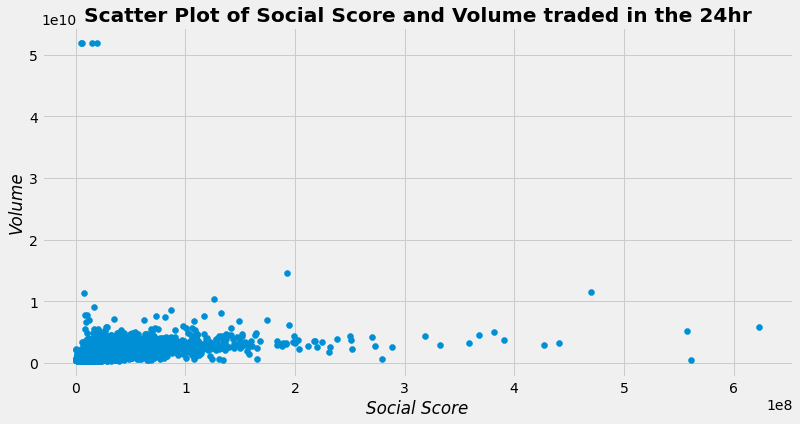

In [ ]:
# scatter plot of social score vs volume

plt.figure(figsize=(12, 6))
plt.scatter(df['social_score'], df['volume'])
plt.title("Scatter Plot of Social Score and Volume traded in the 24hr", fontweight='bold')
plt.xlabel("Social Score", fontstyle='italic')
plt.ylabel("Volume", fontstyle='italic')
plt.show()


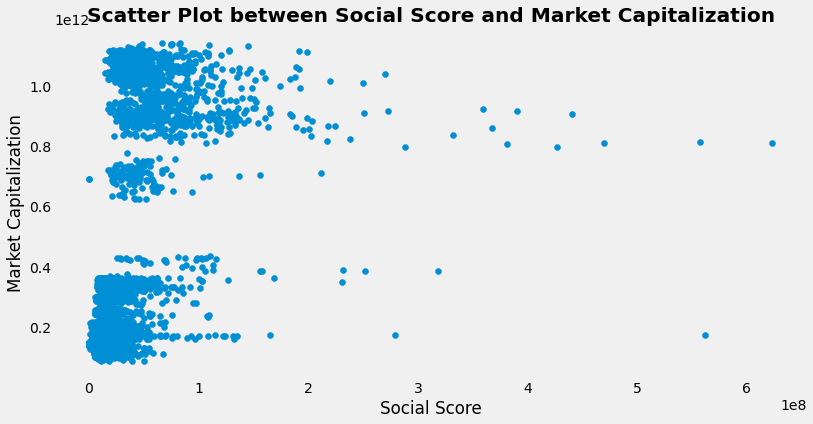

In [ ]:
# scatter plot of social score vs market cap

plt.figure(figsize=(12, 6))
plt.scatter(df['social_score'], df['market_cap'])
plt.xlabel("Social Score")
plt.ylabel("Market Capitalization")
plt.title("Scatter Plot between Social Score and Market Capitalization", fontweight='bold')
plt.grid()
plt.show()

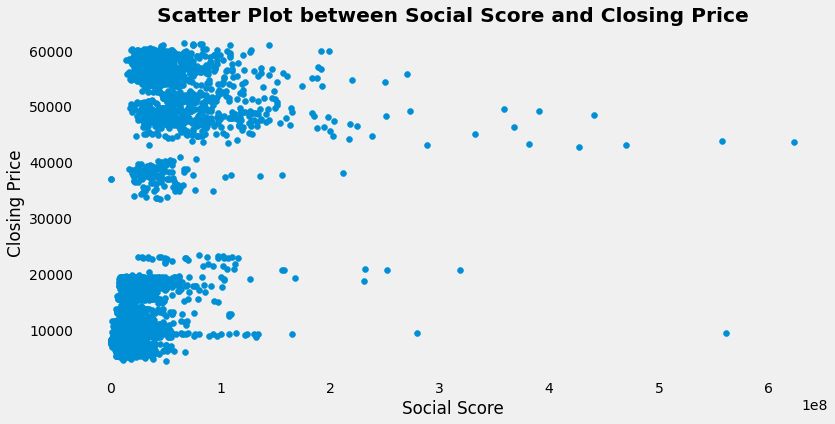

In [ ]:
# scatter plot of social score vs close

plt.figure(figsize=(12, 6))
plt.scatter(df['social_score'], df['close'])
plt.title("Scatter Plot between Social Score and Closing Price", fontweight='bold')
plt.xlabel("Social Score")
plt.ylabel("Closing Price")
plt.grid()
plt.show()


<Figure size 7200x7200 with 0 Axes>

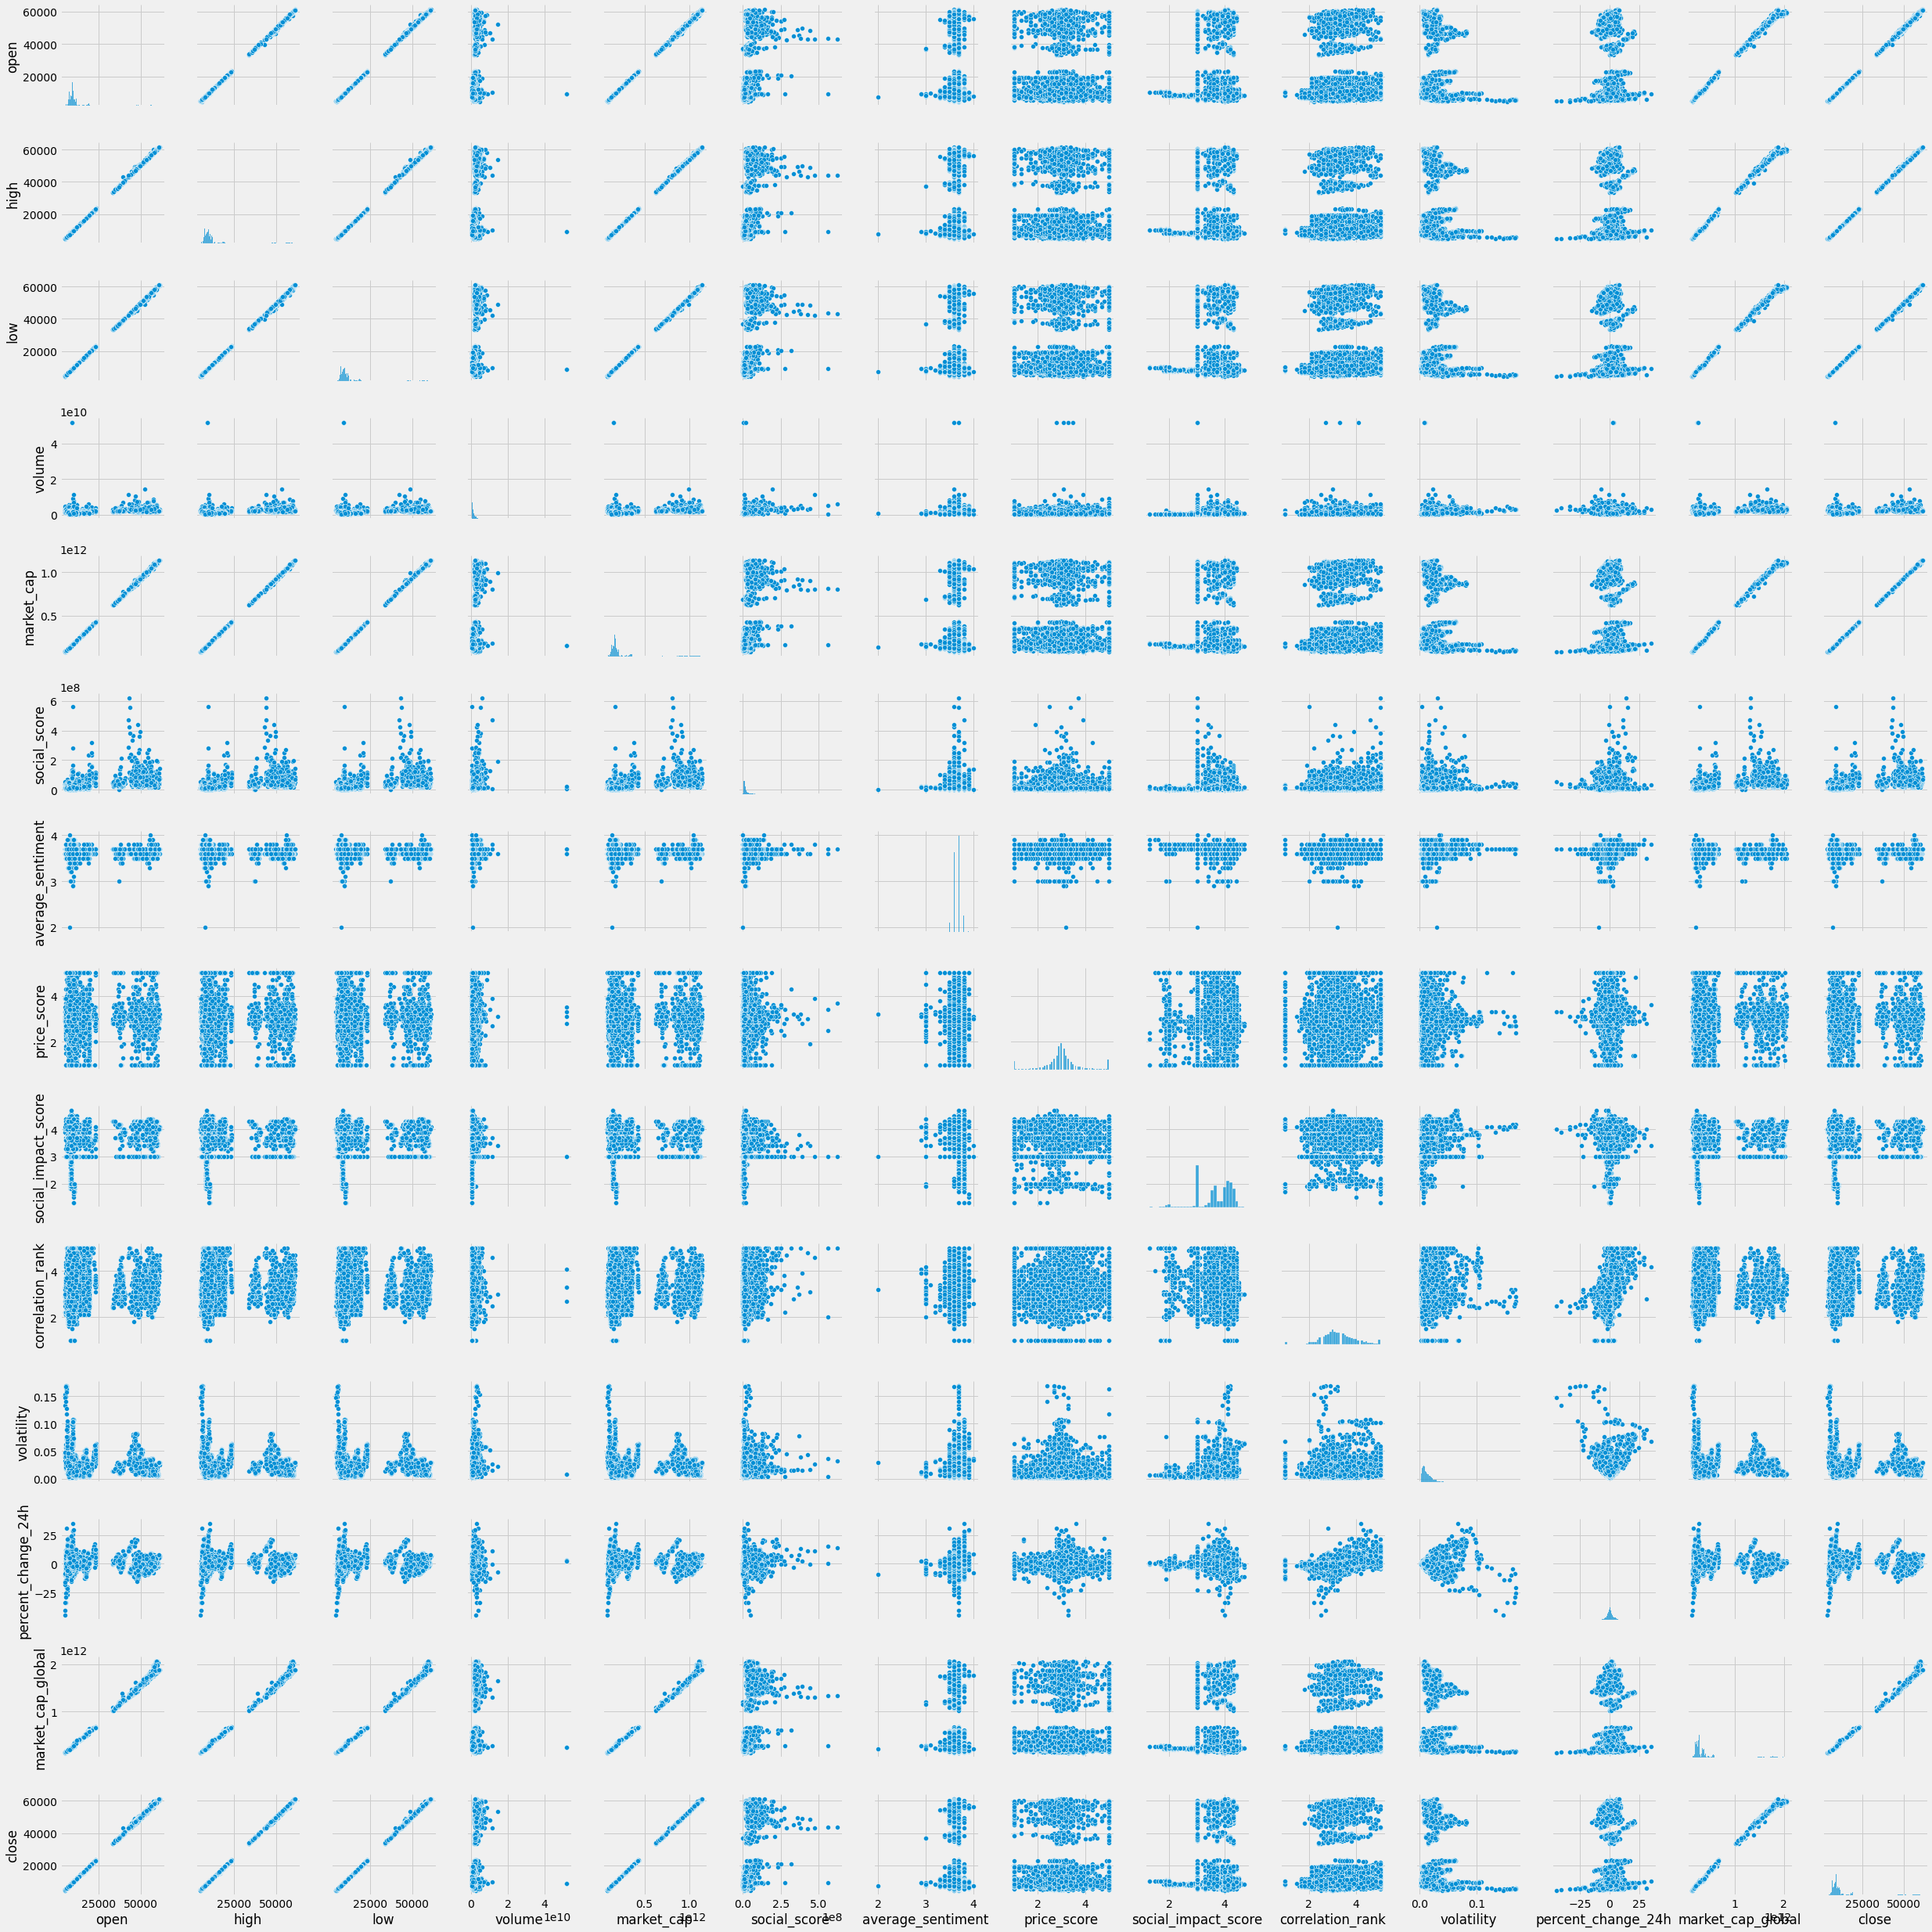

In [ ]:
plt.figure(figsize=(100,100))
sns.pairplot(df)
plt.show()

In [ ]:
# Correlation table of all the variables

correlations = df.corr()
correlations

,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global,close
open,1.000000,0.999964,0.999960,0.401064,0.999934,0.592828,-0.098284,0.016381,-0.048065,0.045702,0.135597,0.089190,0.998854,0.999937
high,0.999964,1.000000,0.999932,0.402449,0.999959,0.594220,-0.098237,0.016685,-0.048117,0.045791,0.137195,0.089405,0.998799,0.999971
low,0.999960,0.999932,1.000000,0.399448,0.999948,0.591725,-0.098178,0.016238,-0.048125,0.045638,0.134257,0.090383,0.998949,0.999956
volume,0.401064,0.402449,0.399448,1.000000,0.401412,0.355317,-0.041462,0.054764,0.006329,0.056297,0.218396,0.057423,0.399012,0.401298
market_cap,0.999934,0.999959,0.999948,0.401412,1.000000,0.593575,-0.099556,0.016799,-0.046886,0.045779,0.135929,0.089915,0.998974,0.999978
social_score,0.592828,0.594220,0.591725,0.355317,0.593575,1.000000,-0.056144,0.034982,-0.017990,0.117302,0.220392,0.141118,0.584767,0.593177
average_sentiment,-0.098284,-0.098237,-0.098178,-0.041462,-0.099556,-0.056144,1.000000,-0.009997,-0.092715,0.034616,0.039798,0.099483,-0.105877,-0.098324
price_score,0.016381,0.016685,0.016238,0.054764,0.016799,0.034982,-0.009997,1.000000,0.025557,0.051479,0.000818,0.031983,0.017598,0.016518
social_impact_score,-0.048065,-0.048117,-0.048125,0.006329,-0.046886,-0.017990,-0.092715,0.025557,1.000000,-0.001844,0.102233,0.030391,-0.043054,-0.048145
correlation_rank,0.045702,0.045791,0.045638,0.056297,0.045779,0.117302,0.034616,0.051479,-0.001844,1.000000,0.093078,0.449280,0.044291,0.045641


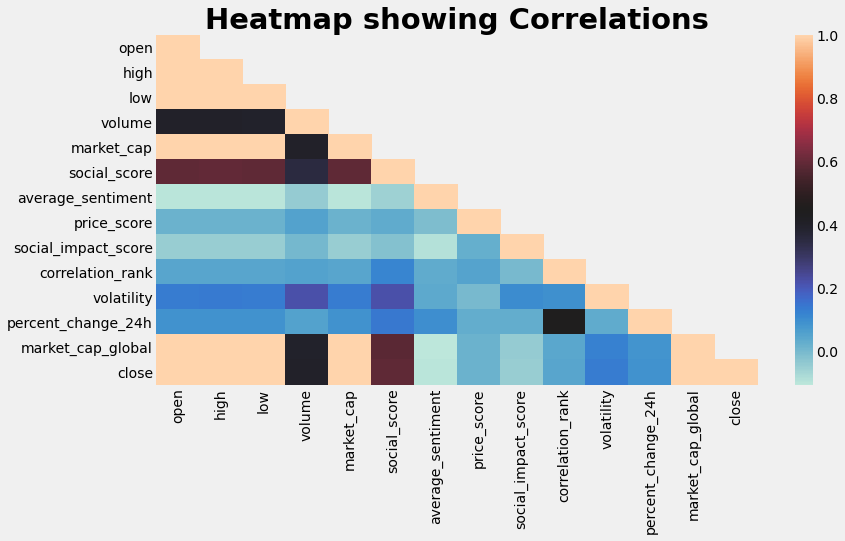

In [ ]:
# Upper triangle of correlations
df_lt = correlations.where(np.tril(np.ones(correlations.shape)).astype(np.bool))

# Plotting correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_lt, cmap='icefire')
plt.title("Heatmap showing Correlations", fontweight='bold', fontsize=29)
plt.show()

There are 7 variables that are highly correlated to each other with a correlation coefficient that is above 0.5. These include: open, close, high, low, market cap, market_cap global and social_score.

## Implementing the solution

### Detecting multicollinearity

In [ ]:
# Checking for multicollinearity on the independent variables only

F = df.drop(['id','close'], 1)
correlations = F.corr()
correlations

,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global
open,1.000000,0.999964,0.999960,0.401064,0.999934,0.592828,-0.098284,0.016381,-0.048065,0.045702,0.135597,0.089190,0.998854
high,0.999964,1.000000,0.999932,0.402449,0.999959,0.594220,-0.098237,0.016685,-0.048117,0.045791,0.137195,0.089405,0.998799
low,0.999960,0.999932,1.000000,0.399448,0.999948,0.591725,-0.098178,0.016238,-0.048125,0.045638,0.134257,0.090383,0.998949
volume,0.401064,0.402449,0.399448,1.000000,0.401412,0.355317,-0.041462,0.054764,0.006329,0.056297,0.218396,0.057423,0.399012
market_cap,0.999934,0.999959,0.999948,0.401412,1.000000,0.593575,-0.099556,0.016799,-0.046886,0.045779,0.135929,0.089915,0.998974
social_score,0.592828,0.594220,0.591725,0.355317,0.593575,1.000000,-0.056144,0.034982,-0.017990,0.117302,0.220392,0.141118,0.584767
average_sentiment,-0.098284,-0.098237,-0.098178,-0.041462,-0.099556,-0.056144,1.000000,-0.009997,-0.092715,0.034616,0.039798,0.099483,-0.105877
price_score,0.016381,0.016685,0.016238,0.054764,0.016799,0.034982,-0.009997,1.000000,0.025557,0.051479,0.000818,0.031983,0.017598
social_impact_score,-0.048065,-0.048117,-0.048125,0.006329,-0.046886,-0.017990,-0.092715,0.025557,1.000000,-0.001844,0.102233,0.030391,-0.043054
correlation_rank,0.045702,0.045791,0.045638,0.056297,0.045779,0.117302,0.034616,0.051479,-0.001844,1.000000,0.093078,0.449280,0.044291


The table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the *inverse* of the matrix above.

> VIF score to detect multicollinearity for the dataset

In [ ]:
#dataframe with the inverse of the correlations matrix for train data
#use these correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global
open,27430.050632,-19630.154049,-16302.008292,-4.113492,8747.686690,-0.592297,8.684758,0.779510,-11.600271,-10.237079,6.628494,20.520416,-245.615828
high,-19630.154049,30607.867254,6670.776592,-22.840432,-18808.502374,-12.141894,-14.827940,-1.520670,19.716222,2.772957,-20.446680,5.370472,1179.529363
low,-16302.008292,6670.776592,22218.736476,29.512514,-12398.680142,29.071275,-16.967438,4.288209,14.215497,8.842141,11.826838,-26.196302,-218.563189
volume,-4.113492,-22.840432,29.512514,1.332001,-1.099642,-0.123464,-0.002855,-0.045684,-0.003467,-0.001196,-0.141750,-0.049585,-1.897863
market_cap,8747.686690,-18808.502374,-12398.680142,-1.099642,23801.608271,-22.371597,20.874381,-2.946718,-20.615248,0.050790,-1.229817,-2.995609,-1327.986061
social_score,-0.592297,-12.141894,29.071275,-0.123464,-22.371597,1.776326,0.026419,-0.020387,0.006369,-0.083322,-0.114265,-0.114294,5.068755
average_sentiment,8.684758,-14.827940,-16.967438,-0.002855,20.874381,0.026419,1.079292,-0.000341,0.076817,0.010550,-0.054597,-0.108894,2.350996
price_score,0.779510,-1.520670,4.288209,-0.045684,-2.946718,-0.020387,-0.000341,1.009231,-0.020726,-0.043967,0.022767,-0.013174,-0.588140
social_impact_score,-11.600271,19.716222,14.215497,-0.003467,-20.615248,0.006369,0.076817,-0.020726,1.062986,0.040923,-0.144042,-0.073122,-1.637383
correlation_rank,-10.237079,2.772957,8.842141,-0.001196,0.050790,-0.083322,0.010550,-0.043967,0.040923,1.277905,-0.097398,-0.581679,-1.369639


### Data Preprocessing

In [ ]:
# Creating the X and y variables

X = df.drop(['id','close'], axis=1)
y = df['close']


# features
features = list(X.columns)

> Standardization

In [ ]:
# Instantiate standard scaler

scaler = StandardScaler()

# transform data
X = scaler.fit_transform(X)

> Splitting the data

In [ ]:
#splitting our data into training and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# The above script splits 80% of the data to training set while 20% of the data to test set. 
# The test_size variable is where we actually specify the proportion of test set.

### Simple Linear Regression

In [ ]:
# Training the Algorithm
#from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Getting the intercept and slope
# ---
# intercept

print(regressor.intercept_)

# slope
# 
print(regressor.coef_)

15290.627921969377
[-5.73679921e+03  8.99642381e+03  5.63987639e+03  2.39522030e-01
  5.39984234e+03 -6.22970879e+00  4.55350583e+00 -7.78237183e-01
 -6.04576970e+00 -2.73336156e+00 -3.26055976e+00  3.87575423e+00
 -6.07688550e+01]


In [ ]:
# Making Predictions
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values, execute the following 
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred

,Actual,Predicted
8217,9553.167595,9527.870407
6069,55018.757681,54944.929730
11711,8059.125481,7987.952173
300,9724.531431,9755.102439
2953,6918.604923,6940.543492
...,...,...
4960,52466.608558,52379.794961
10693,40876.324585,40825.198351
14,8796.234581,8811.945669
4556,13153.964556,13102.616606


> We will note from the output that though our model is not very precise, 
 the predicted percentages are somehow close to the actual ones.

#### Residual plots and heteroskedasticity testing

In [ ]:
# This is our prediction for price based on our model
y_pred = regressor.predict(X_test)
print(y_pred)
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_pred, y_test)
print('residuals:\n',residuals)
# Let's describe our residual:
pd.DataFrame(residuals).describe()

print('residuals mean: \t',residuals.mean())

[ 9527.87040696 54944.92972993  7987.95217275 ...  8811.94566879
 13102.61660587  9279.66826289]
residuals:
 8217    -25.297188
6069    -73.827951
11711   -71.173308
300      30.571008
2953     21.938569
           ...    
4960    -86.813597
10693   -51.126234
14       15.711088
4556    -51.347950
9014    -10.355994
Name: close, Length: 1608, dtype: float64
residuals mean: 	 1.0255070919142613


> Let's show the residual plot

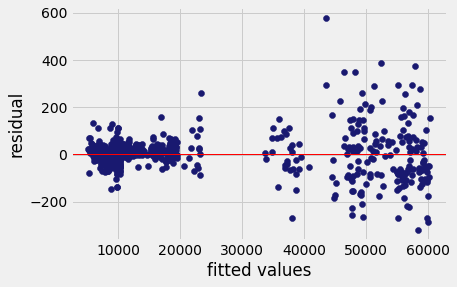

In [ ]:
plt.scatter(y_pred, residuals, color='midnightblue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()


This does not look too bad: our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use [bartlett's test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm). The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.


In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# We compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, then
# this would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed.')
else:
  print('The variances are homogeneous.')

The variances are homogeneous.


In [ ]:
# The R2 score and RMSE for the linear model is 

linear_R2 = a = r2_score(y_test, y_pred)
print("The R2 score for the linear model is:", linear_R2)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

The R2 score for the linear model is: 0.9999837140228542
Mean Absolute Error: 32.69568879846368
Mean Squared Error: 3195.594111718876
Root Mean Squared Error: 56.529586162635894


### Polynomial Regression

In [ ]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 2)
X_poly_train= poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Training the model
regressor = LinearRegression()
regressor.fit(X_poly_train, y_train)

# Making predictions
y_pred1 = regressor.predict(X_poly_test)

# Measuring the accuracy of the model

print("The RMSE score for the polynomial model : ", np.sqrt(mean_squared_error(y_test, y_pred1)))

The RMSE score for the polynomial model :  48.80449529711377


### Lasso Regression

In [ ]:
# instantiating the model

lasso = Lasso(normalize=False)

# fitting the model
lasso.fit(X_train, y_train)

# making predictions
lasso_pred = lasso.predict(X_test)

# assessing the model

print("Lasso Model Metrics")
print("Lasso regression r2 score: ", r2_score(y_test, lasso_pred))
print("Lasso mean absolute error: ", mean_absolute_error(y_test, lasso_pred))
print("Lasso Root mean squared error: ", np.sqrt(mean_squared_error(y_test, lasso_pred)))

Lasso Model Metrics
Lasso regression r2 score:  0.9999283929257415
Lasso mean absolute error:  51.98301254752372
Lasso Root mean squared error:  118.53506997100382


In [ ]:
# Hyperparamter tuning of alpha parameter

clf = GridSearchCV(estimator=Lasso(max_iter=10000),
                   param_grid = {'alpha' : np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))},
                   scoring = 'neg_root_mean_squared_error',
                   cv = 10,
                   refit = True)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [ ]:
# best performing model
clf.best_estimator_

Lasso(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Fitting tuned model

lasso = Lasso(alpha=0.6, max_iter=10000)

lasso.fit(X_train, y_train)

# Predictions
lasso_pred = lasso.predict(X_test)

# Metrics
print("Lasso Model Metrics")
print("Lasso regression r2 score: ", r2_score(y_test, lasso_pred))
print("Lasso mean absolute error: ", mean_absolute_error(y_test, lasso_pred))
print("Lasso Root mean squared error: ", np.sqrt(mean_squared_error(y_test, lasso_pred)))

Lasso Model Metrics
Lasso regression r2 score:  0.9999713334174045
Lasso mean absolute error:  38.35561654554626
Lasso Root mean squared error:  74.9992390554697


The  model improved significantly with a drop in both MAE and RMSE.
Examining the coefficients produced

In [ ]:
lasso_coefficients = {column : coef for column, coef in zip(features, lasso.coef_)}

pd.DataFrame.from_dict(data=lasso_coefficients, orient = 'index',
                       columns = ['Coefficients']).sort_values(by='Coefficients', ascending=False)


,Coefficients
high,6430.517282
market_cap,3578.452451
open,3358.663842
low,769.361951
market_cap_global,99.822073
percent_change_24h,13.435552
average_sentiment,2.333209
price_score,-0.000000
volatility,-2.406632
social_score,-4.459140


### Ridge Regression

In [ ]:
# Instantiating the model
ridge = Ridge(normalize=False)

# Tuning the L2 parameter
clf = GridSearchCV(estimator = ridge,
                   param_grid = {'alpha':np.logspace(-5,2,8)},
                   scoring = 'neg_root_mean_squared_error',
                   cv = 10,
                   )

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [ ]:
# best estimator
clf.best_estimator_

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# fitting best estimator and assessing it's performance
ridge = Ridge(alpha = 0.001, normalize=True, max_iter = 10000, random_state=0)

ridge.fit(X_train, y_train)

# predictions and assessment
ridge_pred = ridge.predict(X_test)

print("Ridge Metrics")
print("R2 score: ", r2_score(y_test, ridge_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, ridge_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, ridge_pred)))

Ridge Metrics
R2 score:  0.9999583435296707
Mean absolute error:  59.42339795089191
Root Mean Squared Error:  90.40868026505765


In [ ]:
# Ridge coefficients
ridge_coef = {column : coef for column, coef in zip(features, ridge.coef_)}

pd.DataFrame.from_dict(data = ridge_coef,
                       orient = 'index',
                       columns = ['Coefficients']).sort_values(by = 'Coefficients', ascending=False)

,Coefficients
high,3463.740823
market_cap,3461.172174
low,3187.580024
open,2939.362678
market_cap_global,1167.727227
social_score,15.734194
percent_change_24h,14.008257
volatility,11.424215
average_sentiment,9.426438
volume,3.306797


### Elastic Net

In [ ]:
elastic = ElasticNet(max_iter=20000)

clf = GridSearchCV(estimator = elastic,
                   param_grid = {'alpha' : np.logspace(-5,2,8),
                                 'l1_ratio' : [.2,.4,.6,.8]},
                   cv = 10,
                   refit = True,
                   scoring = 'neg_root_mean_squared_error')

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=20000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [ ]:
# best estimator
clf.best_estimator_

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=20000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# fitting new parameters and assessing
elastic = ElasticNet(alpha=0.001, l1_ratio = 0.8, max_iter=20000)
elastic.fit(X_train, y_train)

# predictions
elastic_pred = elastic.predict(X_test)
# assessing
print("Elastic Net Metrics")
print("Mean absolute error: ", mean_absolute_error(y_test, elastic_pred))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, elastic_pred)))
print("R2 score: ", r2_score(y_test, elastic_pred))

Elastic Net Metrics
Mean absolute error:  37.74014755319417
Root mean squared error:  71.79751420425876
R2 score:  0.9999737287325801


In [ ]:

# coefficient importance
e_coef = {column : coef for column, coef in zip(features, elastic.coef_)}

pd.DataFrame.from_dict(e_coef, 
                       orient='index', columns= ['Coefs']).sort_values(by='Coefs', ascending=False)

,Coefs
high,5595.115643
low,3426.056476
market_cap,2737.171580
open,2208.762119
market_cap_global,264.041080
percent_change_24h,11.369769
average_sentiment,2.808484
volatility,2.151480
social_score,2.037910
volume,0.967887


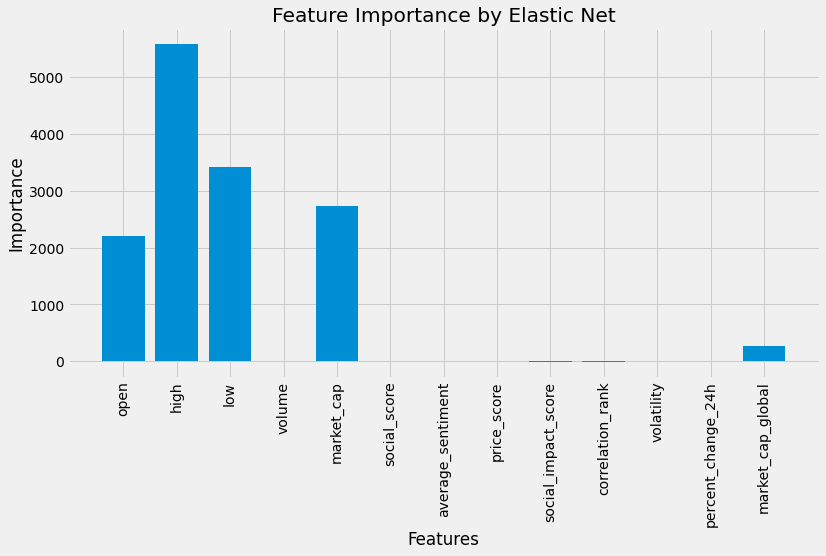

In [ ]:
xvals = range(len(e_coef))

# Visualizing Coefficients of Elastic Net
plt.figure(figsize=(12, 6))
plt.bar(xvals,elastic.coef_, orientation = 'vertical')
plt.xticks(xvals, features, rotation='vertical')
plt.title('Feature Importance by Elastic Net')
plt.xlabel('Features')
plt.ylabel("Importance")
plt.show()

### Neural Network Regressors

#### MLP Regressor

In [ ]:
# creating a subset of data using features selected mainly by elastic net regression

useful = ['high', 'low', 'market_cap', 'open', 'market_cap_global', 'percent_change_24h', 'average_sentiment', 'close']

subd = df.loc[:, useful]
subd.head()

,high,low,market_cap,open,market_cap_global,percent_change_24h,average_sentiment,close
0,9428.490628,9422.849081,1.737635e+11,9422.849081,2.818066e+11,1.434516,3.6,9428.279323
1,7992.059917,7967.567267,1.426942e+11,7985.359278,2.126897e+11,-2.459507,3.7,7967.567267
2,49394.593520,49068.057050,9.166977e+11,49202.033780,1.530712e+12,4.942448,3.7,49120.738480
4,10535.737120,10384.798220,1.921183e+11,10535.737120,3.386925e+11,2.609576,3.7,10384.798220
6,9712.247413,9697.250948,1.767035e+11,9697.250948,2.807819e+11,1.159070,3.7,9712.247413


In [ ]:
# normalizing and splitting test and training data
X = subd.drop(['close'], axis=1)
y = subd['close']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)


#normalizing the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# instantiating the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='relu',
                   solver='adam', learning_rate_init=0.001,
                   max_iter = 2000, learning_rate='constant', random_state=23,
                   validation_fraction=.1, verbose=2)

# fitting the model

mlp.fit(X_train, y_train)

# predictions
mlp_pred = mlp.predict(X_test)

# evaluating

print("Model Metrics")
print("Mean absolute error:\t", mean_absolute_error(y_test, mlp_pred))
print("Root mean squared error:\t", np.sqrt(mean_squared_error(y_test, mlp_pred)))
print("*" * 50)

Iteration 1, loss = 216836430.87255651
Iteration 2, loss = 216719033.82021418
Iteration 3, loss = 216091493.54627779
Iteration 4, loss = 213916472.77242935
Iteration 5, loss = 208391066.94284308
Iteration 6, loss = 196873265.80996937
Iteration 7, loss = 177157287.17556927
Iteration 8, loss = 147175949.80063602
Iteration 9, loss = 108836022.70700249
Iteration 10, loss = 68724059.51648514
Iteration 11, loss = 36158555.55017323
Iteration 12, loss = 17434913.76239773
Iteration 13, loss = 10333835.70166216
Iteration 14, loss = 8493475.71914268
Iteration 15, loss = 7982694.23480756
Iteration 16, loss = 7690618.97532700
Iteration 17, loss = 7429005.09112103
Iteration 18, loss = 7168982.12297240
Iteration 19, loss = 6905736.34315337
Iteration 20, loss = 6636609.33901110
Iteration 21, loss = 6359482.70785131
Iteration 22, loss = 6081513.74807589
Iteration 23, loss = 5802509.66178441
Iteration 24, loss = 5512246.90112213
Iteration 25, loss = 5226548.08300984
Iteration 26, loss = 4935055.09330814

#### ANN model

In [ ]:
# building Artificial Neural Network
ann = keras.Sequential()

ann.add(layers.Dense(256, input_dim=7))
ann.add(layers.Dense(256, activation='relu'))
ann.add(layers.Dense(256, activation = 'relu'))
ann.add(layers.Dense(1, activation='relu'))


ann.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.01),
    loss = keras.losses.mean_squared_error,
    metrics = ['mae', 'mse']
)

ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 133,889
Trainable params: 133,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model
history2 = ann.fit(X_train, y_train, batch_size=150, epochs=15, verbose=2, validation_split=.2)

Epoch 1/15
35/35 - 1s - loss: 200703968.0000 - mae: 9501.2422 - mse: 200703968.0000 - val_loss: 31438830.0000 - val_mae: 4208.5693 - val_mse: 31438830.0000
Epoch 2/15
35/35 - 0s - loss: 24206784.0000 - mae: 3709.6350 - mse: 24206784.0000 - val_loss: 7955438.5000 - val_mae: 2237.1899 - val_mse: 7955438.5000
Epoch 3/15
35/35 - 0s - loss: 2202885.0000 - mae: 1037.6353 - mse: 2202885.0000 - val_loss: 310822.4062 - val_mae: 364.8586 - val_mse: 310822.4062
Epoch 4/15
35/35 - 0s - loss: 123667.1875 - mae: 218.2508 - mse: 123667.1875 - val_loss: 72431.9531 - val_mae: 150.0432 - val_mse: 72431.9531
Epoch 5/15
35/35 - 0s - loss: 48396.3281 - mae: 136.2614 - mse: 48396.3281 - val_loss: 48833.2031 - val_mae: 139.0917 - val_mse: 48833.2031
Epoch 6/15
35/35 - 0s - loss: 39195.3398 - mae: 128.3366 - mse: 39195.3359 - val_loss: 44042.9219 - val_mae: 121.1657 - val_mse: 44042.9219
Epoch 7/15
35/35 - 0s - loss: 34332.0547 - mae: 120.7936 - mse: 34332.0547 - val_loss: 35833.1250 - val_mae: 121.8914 - val

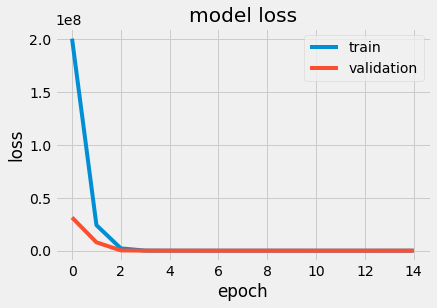

In [ ]:
# loss plots
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# making predictions and evaluating

ann_preds  = ann.predict(X_test)

# Model Metrics
print("RMSE OF ANN:\t", np.sqrt(mean_squared_error(y_test, ann_preds)))

RMSE OF ANN:	 186.27961560539558


### Random Forest Regressor

> Since Random Forest is a bootstrapping technique that picks from different set of features for different models, every model sees a different set of data points and this means that the Random Forest algorithm is not affected by multicollinearity.



In [ ]:
# Feature and label seperation
X = df.drop(['id','close'], axis=1)
y = df['close']


# Splitting the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Instantiate model with 1000 decision trees
rf_mod  =  RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model

rf_mod  =  rf_mod.fit(X_train, y_train)

In [ ]:
# Making predictions based on the trained model 

rf_pred = rf_mod.predict(X_test)

In [ ]:
# Model Evaluation

print('Mean Absolute Error (RF):', mean_absolute_error(y_test, rf_pred))  
print('Mean Squared Error (RF):', mean_squared_error(y_test, rf_pred))  
print('Root Mean Squared Error (RF):', np.sqrt(mean_squared_error(y_test, rf_pred)))

Mean Absolute Error (RF): 27.061234772871597
Mean Squared Error (RF): 4426.201970245538
Root Mean Squared Error (RF): 66.52970742642371




> The random forest model achieved an RMSE of 66.53 which is poorer compared to our baseline model.



#### Hyperparamter tuning

In [ ]:
search = RandomizedSearchCV(estimator=RandomForestRegressor(),
                      param_distributions = {'n_estimators' : [200, 300, 400, 500, 600],
                                    'max_depth' : np.arange(3, 11),
                                    'min_samples_split' : np.arange(5, 30, 5)})

search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [ ]:
search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# fitting new random forest

rf_mod = RandomForestRegressor(n_estimators=300, min_samples_split=5, max_depth=7)

rf_mod.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Feature importance

In [ ]:
# Get numerical feature importances
importances = list(rf_mod.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(X, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: market_cap_global    Importance: 0.327
Variable: market_cap           Importance: 0.219
Variable: low                  Importance: 0.175
Variable: high                 Importance: 0.15
Variable: open                 Importance: 0.129
Variable: volume               Importance: 0.0
Variable: social_score         Importance: 0.0
Variable: average_sentiment    Importance: 0.0
Variable: price_score          Importance: 0.0
Variable: social_impact_score  Importance: 0.0
Variable: correlation_rank     Importance: 0.0
Variable: volatility           Importance: 0.0
Variable: percent_change_24h   Importance: 0.0


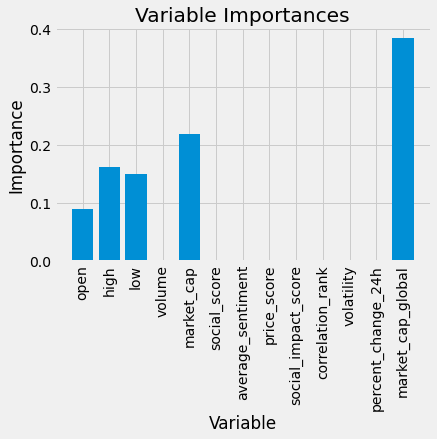

In [ ]:
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, X, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');

In [ ]:
# Model Evaluation
rf_pred = rf_mod.predict(X_test)

print('Mean Absolute Error (RF):', mean_absolute_error(y_test, rf_pred))  
print('Mean Squared Error (RF):', mean_squared_error(y_test, rf_pred))  
print('Root Mean Squared Error (RF):', np.sqrt(mean_squared_error(y_test, rf_pred)))

Mean Absolute Error (RF): 45.06958343381709
Mean Squared Error (RF): 6090.647831942742
Root Mean Squared Error (RF): 78.04260267278855


> At the top of the list of important features is market cap global followed by market cap which indicate the total dollar market value of an asset. This tells us that the best predictors of the closing price of a crypto is the market capitalizations of the coin, which is a rather intuitive finding. 

> Other relatively important factors are the various prices the cryptocurrency ranged at within the one hour timeframe, the open price of the coin, the highest price and the lowest price. 





### XGBOOST

In [ ]:
# Import the regressor needed

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


# Instantiate the model
xgb = XGBRegressor()

In [ ]:
# Training the model
xgb.fit(X_train,y_train)

# Making predictions on the model trained
xgb_pred = xgb.predict(X_test)

[07:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Model Evaluation

print('Mean Absolute Error (XGB):', mean_absolute_error(y_test, xgb_pred))  
print('Mean Squared Error (XGB):', mean_squared_error(y_test, xgb_pred))  
print('Root Mean Squared Error (XGB):', np.sqrt(mean_squared_error(y_test, xgb_pred)))

Mean Absolute Error (XGB): 51.685461020075365
Mean Squared Error (XGB): 7602.78051979378
Root Mean Squared Error (XGB): 87.1939247871879


#### Hyperparameter tuning

In [ ]:
# Import the regressor needed

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


# Instantiate the model
xgb = XGBRegressor(seed = 20)

In [ ]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
clf = GridSearchCV(estimator=xgb, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

In [ ]:
# Training the model
clf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[07:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[07:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 10.5min finished


[08:00:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=20, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
             

In [ ]:
# Making predictions
xgb_pred = clf.predict(X_test)

# Model Evaluation

print('Mean Absolute Error (XGB):', mean_absolute_error(y_test, xgb_pred))  
print('Mean Squared Error (XGB):', mean_squared_error(y_test, xgb_pred))  
print('Root Mean Squared Error (XGB):', np.sqrt(mean_squared_error(y_test, xgb_pred)))

Mean Absolute Error (XGB): 28.311761103700206
Mean Squared Error (XGB): 3893.382341532471
Root Mean Squared Error (XGB): 62.39697381710487


## Challenging the solution

In [ ]:
# using subest of features selected by Elastic Net model
revised = ['high', 'low', 'market_cap', 'open', 'market_cap_global','percent_change_24h',
           'average_sentiment', 'close']

subset = df.loc[:, revised]
subset.head()

,high,low,market_cap,open,market_cap_global,percent_change_24h,average_sentiment,close
0,9428.490628,9422.849081,1.737635e+11,9422.849081,2.818066e+11,1.434516,3.6,9428.279323
1,7992.059917,7967.567267,1.426942e+11,7985.359278,2.126897e+11,-2.459507,3.7,7967.567267
2,49394.593518,49068.057046,9.166977e+11,49202.033778,1.530712e+12,4.942448,3.7,49120.738484
4,10535.737119,10384.798216,1.921183e+11,10535.737119,3.386925e+11,2.609576,3.7,10384.798216
6,9712.247413,9697.250948,1.767035e+11,9697.250948,2.807819e+11,1.159070,3.7,9712.247413


In [ ]:
# Features and labels

X = subset.drop(['close'], axis=1)
y = subset['close']

# Train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=23)

# Standardizing the variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
p_features = PolynomialFeatures(degree = 2)

train_poly = p_features.fit_transform(X_train)
test_poly = p_features.transform(X_test)


# fitting the model
poly = LinearRegression()
poly.fit(train_poly, y_train)

# making predictions
p_pred = poly.predict(test_poly)

# model evaluation
print("RMSE of revised Poly:\t", np.sqrt(mean_squared_error(y_test, p_pred)))
print("MAE of revised Poly:\t", mean_absolute_error(y_test, p_pred))

RMSE of revised Poly:	 46.70261822641185
MAE of revised Poly:	 20.44049961284942


In [ ]:
# To compare the actual output values for X_test with the predicted values, execute the following 
values= pd.DataFrame({'Actual': y_test, 'Predicted': p_pred})
values.sample(10,random_state=10)

,Actual,Predicted
3395,16744.615329,16585.454639
8721,8798.131555,8796.667856
5152,7964.756719,7957.263956
9952,11111.822007,11109.734496
3379,9339.730959,9331.400229
2147,10317.169221,10278.776172
9780,10946.870065,10948.966669
2762,7365.322262,7372.449371
7166,7141.171977,7146.986112
12010,8190.826571,8203.081831


In [ ]:
from sklearn.model_selection import KFold
CV=KFold(n_splits=10,shuffle=False)
scores=cross_val_score(poly,X_train,y_train,cv=CV,scoring='neg_root_mean_squared_error')
print('RMSE:', scores.mean())

RMSE: -63.78706494854339


### Conclusions
* VARIABLES:
Exclusion of key indicators like social media and volatility as factors that affect the closing price of a cryptocurrency.

* DATASET:
Inadequacy of data for use in forecasting, Lack of a timestamp really hampered the chances of us forecasting prices over a period of time.

* MODELING:
Unreliability of machine learning models in making predictions.

* VOLUME:
Had minute impact on the closing price


### Recommendations
* RESEARCH: Investors to use modeling as a complement to doing extensive research before diving into cryptocurrency. Investors should not solely rely on models to predict the prices of crypto prices because it is not guaranteed that whatever happened in the market in the past will have a bearing on what happens today as there are so many factors that should be taken into consideration.

* VARIABLES: Exclusion of key indicators such as social media and volatility as key coefficients yet we know that they do have a bearing on the closing prices of crypto. We encourage investors to look at every other feature before deciding to speculate on crypto prices. Monitor external factors that sway the market; which are factors which modelling ignored or we didn't have in our data.

* SEASONALITY: The inclusion of a timestamp in a forecasting dataset to examine how the market varies over time. 

* MODELING: Given this data, if one needed to make predictions, our polynomial model would be the best bet. This is because it achieved the lowest MAE especially with our many extreme values and it also achieved a pretty low RMSE. 